# Data Analysis for Parking tickets - City of Vancouver

# Importing relevant libraries

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.colors import Normalize
%matplotlib inline

## Loading Dataset

In [65]:
parking_tickets=pd.read_json(r'D:\Downloads\City of Vancouver - Assessment\parking-tickets.json')

## Dataset Info

In [66]:
parking_tickets.head()

,block,street,entrydate,bylaw,section,status,infractiontext,year,bi_id
0,2000,W 41ST AVE,2023-10-14,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,3548528
1,5600,BALSAM ST,2023-10-14,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,3548531
2,5700,VINE ST,2023-10-14,2952,5(4)(A)(ii),IS,PARK IN A METERED SPACE IF THE PARKING METER H...,2023,3548532
3,3000,VICTORIA DRIVE,2020-06-08,2849,17.6(A),IS,PARK AT A PLACE ON A STREET WHERE A TRAFFIC SI...,2020,3548540
4,3400,CROWLEY DRIVE,2020-06-08,2849,21.1,IS,STOP IN PASSENGER ZONE,2020,3548542


In [67]:
parking_tickets.shape

(1803280, 9)

In [68]:
parking_tickets.dtypes

block              int64
street            object
entrydate         object
bylaw              int64
section           object
status            object
infractiontext    object
year               int64
bi_id              int64
dtype: object

## Data Cleaning

In [69]:
parking_tickets['entrydate'] = pd.to_datetime(parking_tickets['entrydate'], format='%Y-%m-%d')

In [70]:
parking_tickets.dtypes

block                      int64
street                    object
entrydate         datetime64[ns]
bylaw                      int64
section                   object
status                    object
infractiontext            object
year                       int64
bi_id                      int64
dtype: object

In [71]:
for col in parking_tickets.columns:
    pct_missing=np.mean(parking_tickets[col].isnull())
    print(f"{col} - {pct_missing}%")

block - 0.0%
street - 0.0%
entrydate - 0.0%
bylaw - 0.0%
section - 0.0%
status - 0.0%
infractiontext - 0.5300729781287432%
year - 0.0%
bi_id - 0.0%


### How many unique hundred-blocks was the rule “Stopping at a place where a traffic sign prohibits stopping” enforced July 2023?

In [72]:
july23_parking = parking_tickets[(parking_tickets['entrydate'].dt.month == 7) & (parking_tickets['entrydate'].dt.year == 2023)]

specific_infraction = july_parking[july_parking['infractiontext'].str.contains("STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING", na=False)]

bylaw_section_unique_groups = specific_infraction[['bylaw', 'section']].drop_duplicates()

bylaw_section_unique_groups

,bylaw,section
12314,2849,17.1(B)
100825,2849,17.1(A)


In [73]:
unique_block_counts = specific_infraction.groupby(['bylaw', 'section'])['block'].nunique()

total_unique_blocks = unique_block_counts.sum()

print("Total unique hundred-blocks for the specified infraction:", total_unique_blocks)

Total unique hundred-blocks for the specified infraction: 85


### Can you provide a heat map of “Stopping at a place where a traffic sign prohibits stopping” parking tickets across the City in July 2023?

In [74]:
ticket_counts = specific_infraction.groupby(['street', 'block']).size().reset_index(name='count')

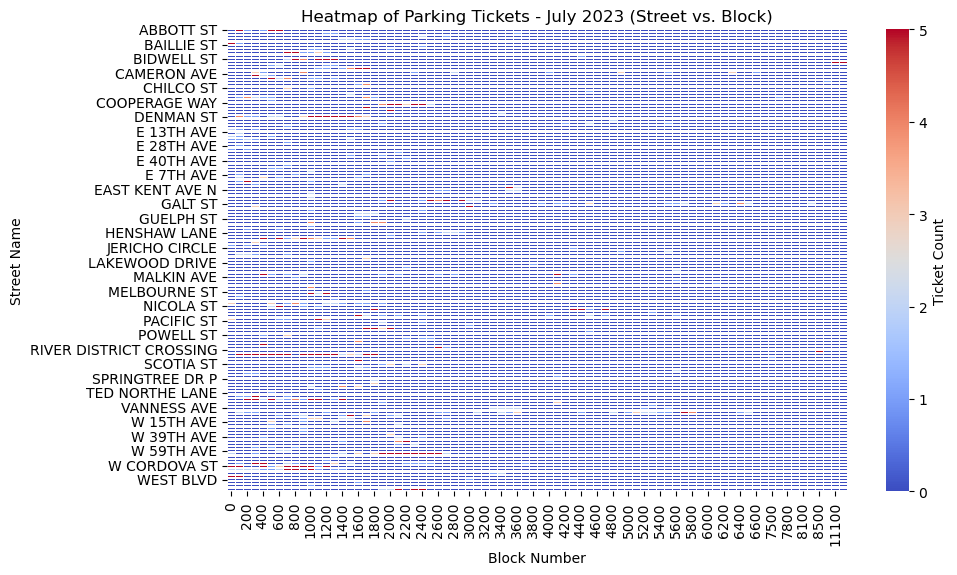

In [75]:
heatmap_data = ticket_counts.pivot(index='street', columns='block', values='count').fillna(0)

norm = Normalize(vmin=0, vmax=5)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=False, fmt=".0f", cmap='coolwarm', norm=norm, linewidths=.5, cbar_kws={'label': 'Ticket Count'})
plt.title('Heatmap of Parking Tickets - July 2023 (Street vs. Block)')
plt.xlabel('Block Number')
plt.ylabel('Street Name')
plt.show()

### How does this change month by month since the beginning of 2020?

In [76]:
tickets_2020onwards = parking_tickets[parking_tickets['infractiontext'].str.contains("STOP AT A PLACE WHERE A TRAFFIC SIGN PROHIBITS STOPPING", na=False)]

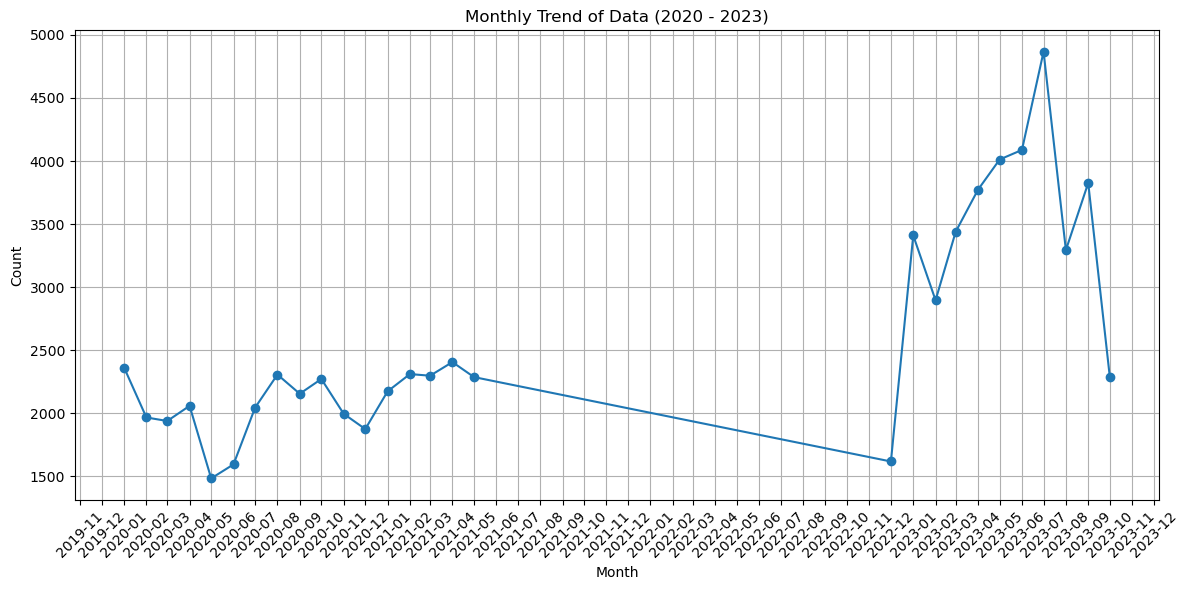

In [79]:
monthly_tickets = tickets_2020onwards.groupby(tickets_2020onwards['entrydate'].dt.to_period("M")).size()

monthly_tickets = monthly_tickets.reset_index(name='count')
monthly_tickets['entrydate'] = monthly_tickets['entrydate'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_tickets['entrydate'], monthly_tickets['count'], marker='o', linestyle='-')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Monthly Trend of Data (2020 - 2023)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### What was the most frequent type of parking ticket in the Kensington neighbourhood in July 2023?

In [80]:
neighbourhood_data=pd.read_excel(r'D:\Downloads\City of Vancouver - Assessment\StreetCentreline_HundredBlock.xlsx')

In [81]:
neighbourhood_data.head()

,OBJECTID,COV_SOURCE_KEY,LASTUPDATE,UNIT_DESCRIPTION,OWNEDBY,STREET_CLASS,DISPOSITION_STATE,SEGTYPE,MAINTENANCE,INSTALLDATE,...,LOW_ADDRESS,TO_STREET,LAST_UPDATED_BY,MATERIAL,DIRECTION,HBLOCK,FROM_STREET_LONG,TO_STREET_LONG,NEIGHBORHOOD,SHAPE_Length
0,1,42835,2024-04-09 07:02:44,QUESNEL DRIVE from W 21ST AV to VALDEZ ROAD,COVAV,Street,In Service,Collector,COV Engineering,1900-01-01 08:00:00,...,3700.0,1989.0,ENHANMGETASK,Asphalt,blank,3700 QUESNEL DRIVE,W 21ST AV,VALDEZ ROAD,Dunbar-Southlands,37.962869
1,2,42835,2024-04-09 07:02:44,QUESNEL DRIVE from W 21ST AV to VALDEZ ROAD,COVAV,Street,In Service,Collector,COV Engineering,1900-01-01 08:00:00,...,3700.0,1989.0,ENHANMGETASK,Asphalt,blank,3700 QUESNEL DRIVE,W 21ST AV,VALDEZ ROAD,Dunbar-Southlands,89.801531
2,3,209983,2021-04-06 21:05:13,GORE AV,COVAV,Street,In Service,Residential,COV Engineering,2100-01-01 08:00:00,...,900.0,1987.0,enpbn,NaN,NaN,900-1000 GORE AV,PRIOR ST,UNNAMED ST,Strathcona,33.919118
3,4,209983,2021-04-06 21:05:13,GORE AV,COVAV,Street,In Service,Residential,COV Engineering,2100-01-01 08:00:00,...,900.0,1987.0,enpbn,NaN,NaN,900-1000 GORE AV,PRIOR ST,UNNAMED ST,Strathcona,126.791105
4,5,212046,2024-04-10 18:51:01,Unnamed Street,Private,Street,In Service,Residential,Private,2100-01-01 08:00:00,...,200.0,1987.0,ENAFP,NaN,NaN,200-300 UNNAMED ST,GORE AV,UNNAMED ST,Strathcona,78.254885


In [82]:
neighbourhood_data_relevant = neighbourhood_data[['STREET_NAME', 'NEIGHBORHOOD']]

In [83]:
merged_data = pd.merge(parking_tickets, neighbourhood_data_relevant, left_on='street', right_on='STREET_NAME')

In [84]:
kensington_july_2023 = merged_data[
    (merged_data['NEIGHBORHOOD'].str.contains("Kensington", na=False)) &
    (merged_data['entrydate'].dt.month == 7) &
    (merged_data['entrydate'].dt.year == 2023)
]

# Find the most frequent type of parking ticket
most_frequent_ticket = kensington_july_2023['infractiontext'].mode()[0]

print(f"The most frequent type of parking ticket in Kensington in July 2023 was: {most_frequent_ticket}")

The most frequent type of parking ticket in Kensington in July 2023 was: STOP ON ANY STREET OR PORTION OF A STREET DESIGNATED AS A PRIORITY CONGESTION MANAGEMENT ROADWAY DURING THE TIME STOPPING IS PROHIBITED
